In [7]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import scipy.stats as stats
import copy
import sys
import os

#for importing data
import torchvision
import torchvision.transforms as T
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset, Subset
import pandas as pd

#for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

C:\Users\elmog\AppData\Local\Temp\ipykernel_7924\1517835734.py:21: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


In [8]:
#GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [9]:
os.environ['TORCH_HOME'] = './'

In [10]:
# Transformations
# Step 0 : normalize
# Step 1 : convert to tensor
transform = T.Compose([
    T.ToTensor(), #scale image to be between ZERO & ONE
    #min value = (0 - mean 0.5) / std 0.5 = -1
    #max value = (1 - mean 0.5) / std 0.5 = 1
    T.Normalize(
        mean=[0.5,0.5,0.5],
        std =[0.5,0.5,0.5]
        ),  
    #T.Resize()
    #T.RandomHorizontalFlip(p=0.5)
])

In [14]:
# Step 2: convert into pytorch dataset 
train_data = torchvision.datasets.CIFAR10(
                                root='./data', 
                                download=True, 
                                train=True, 
                                transform=transform)

Files already downloaded and verified


In [30]:
print(train_data.data.shape)

(50000, 32, 32, 3)


In [31]:
# Step 4: Translate into dataloader objects
batchsize = 32
train_loader = DataLoader(train_data, batch_size=batchsize, shuffle=True, drop_last=True)

In [32]:
# unique class categories
print(train_data.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [34]:
X, y = next(iter(train_loader))
print(X.data.shape)

# for i in range(32):
#     ax = plt.subplot(4,8, i+1)
#     plt.imshow(imgs[i].squeeze().reshape(32,32), cmap='magma')
#     plt.xticks([])
#     plt.yticks([])

torch.Size([32, 3, 32, 32])


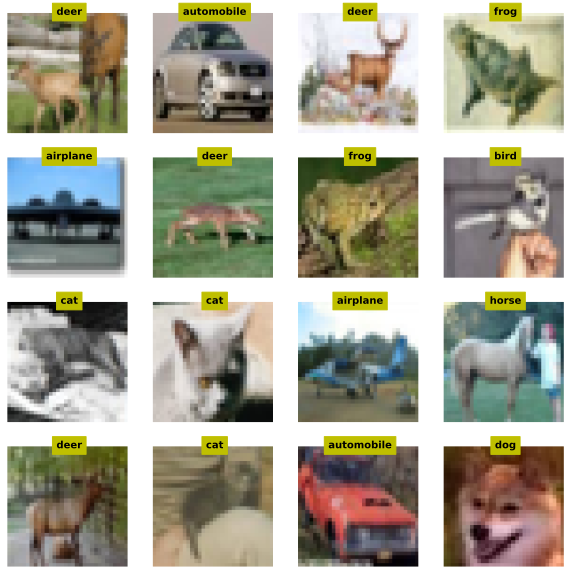

In [36]:
# check for a few random images
fix, axs = plt.subplots(4,4,figsize=(10,10))
for i, ax in enumerate(axs.flatten()):
    #extract the image (transpose it back to 32x32x3) so matplot can understand it
    pic = X.data[i].numpy().transpose((1,2,0))
    pic = pic / 2 + 0.5 #undo normalization
    
    label = train_data.classes[y[i]]
    
    ax.imshow(pic)
    ax.text(16,0, label, ha='center', fontweight='bold', color='k', backgroundcolor='y')
    ax.axis('off')



tensor(6)